# Multiple Domain Testing

## Mash Tests

In [4]:
import test_manifold_algorithms as tma
from MASH_MD import MASH
import matplotlib.pyplot as plt
import numpy as np

### Toy Data

In [5]:
d1 = np.random.randint(10, size = (3, 4))
d2 = np.random.randint(10, size = (3, 2))
d3 = np.random.randint(10, size = (3, 4))
d3

array([[4, 5, 7, 0],
       [7, 3, 8, 2],
       [3, 0, 1, 4]])

Time Data Below
 Time it took to execute the graph for domain 0:  0.04531
 Time it took to compute kernal 0:  4e-05
 Time it took to execute SGDM for domain 1:  0.00023
 Time it took to execute the graph for domain 1:  0.03468
 Time it took to execute the graph for domain 2:  0.02781
 Time it took to compute kernal 2:  4e-05
Length of weights to add: 10
Length of edges to add: 1
Length of edges to add: 1
Length of edges to add: 2
Length of edges to add: 2
Length of edges to add: 2
Length of edges to add: 2


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:108: UserWarning: Cannot set knn (2) to be greater than n_samples - 2 (1). Setting knn=1
  warnings.warn(


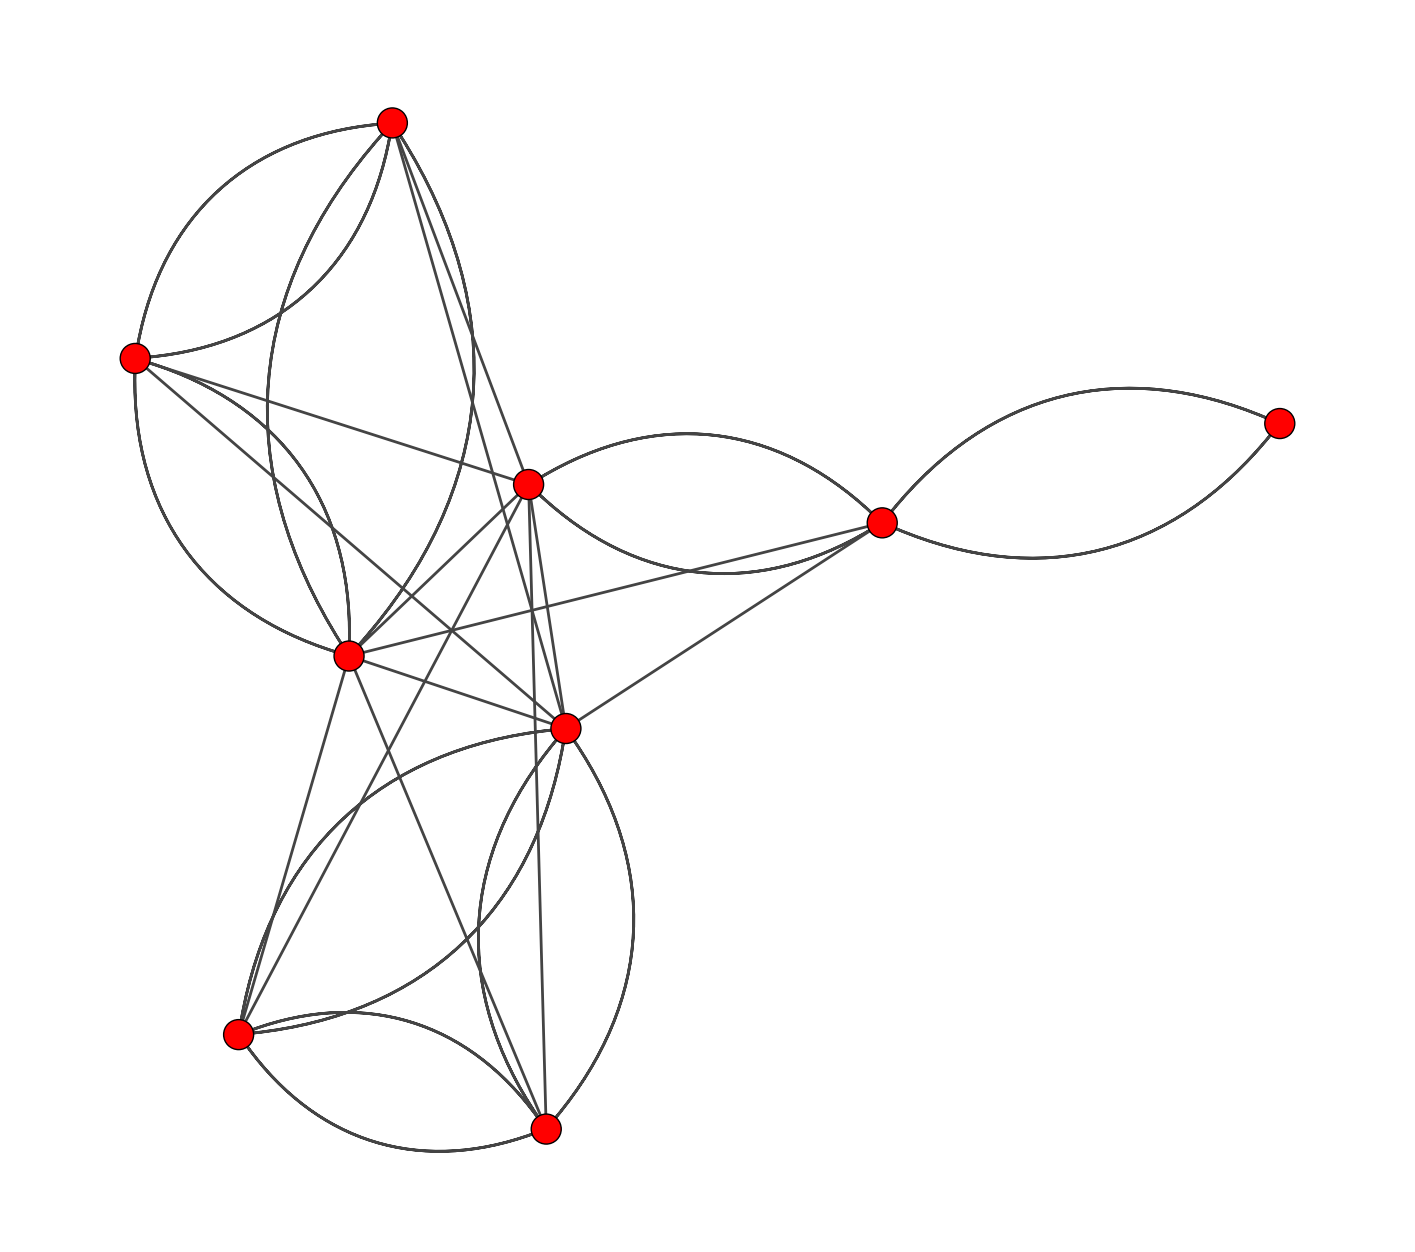

 Time it took to compute merge_graphs function:  0.27842
 Time it took to compute similarity_matrix function:  3e-05
Using optimal t value of 4
 Time it took to compute diffusion process:  0.00373
Fit process finished. We recommend calling optimize_by_creating_connections.


In [6]:
test = MASH(t = -1, knn = 2, distance_measures= ["default", "euclidean", "default"], verbose = 7)
test.fit([d1, d2, d3], np.array([[2, 2, 2]]))

### Actual data


In [7]:
dc0a = tma.test_manifold_algorithms("iris.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=42)
dc0b = tma.test_manifold_algorithms("iris.csv", split = "distort", percent_of_anchors= [0.05], verbose = 5, random_state=42)


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

MDS initialized with 4 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

MDS initialized with 4 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [8]:
md = MASH(t = -1, knn = 5, distance_measures= ["default", "euclidean", "default"], verbose = 7)

In [9]:
#Testing fit portions
md.domains = [dc0a.split_A, dc0b.split_B, dc0a.split_B]
md.domain_count = len(md.domains)
md.build_graphs()

 Time it took to execute the graph for domain 0:  0.08481
 Time it took to compute kernal 0:  0.0003
 Time it took to execute SGDM for domain 1:  0.00037
 Time it took to execute the graph for domain 1:  0.07542


 Time it took to execute the graph for domain 2:  0.23747
 Time it took to compute kernal 2:  0.00026


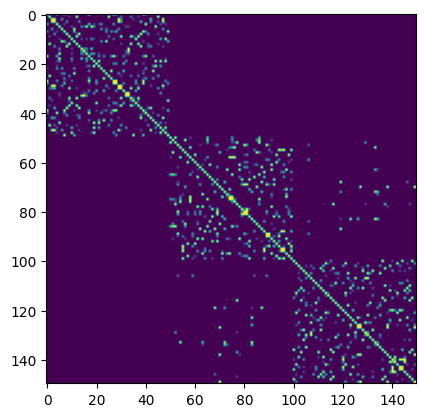

In [10]:
plt.imshow(md.kernals[0])

In [11]:
md.known_anchors = np.column_stack([dc0a.anchors[:50], dc0b.anchors[:50, 0]])
md.known_anchors[:4]

array([[28, 28, 28],
       [ 6,  6,  6],
       [70, 70, 70],
       [62, 62, 62]])

In [12]:
#Cache the lengths of the domains
md.len_domains = [len(domain) for domain in md.domains]
for length in md.len_domains:
    print(length)

150
150
150


In [13]:
md.known_anchors_adjusted = np.array(md.known_anchors)
for i, length in enumerate(md.len_domains):
    if i == len(md.domains) - 1:
        break
    else:
        md.known_anchors_adjusted += np.concatenate((np.repeat(0, i+1), np.repeat(length, len(md.domains)-(i+1))))
md.known_anchors_adjusted[:4], md.known_anchors[:4]

(array([[ 28, 178, 328],
        [  6, 156, 306],
        [ 70, 220, 370],
        [ 62, 212, 362]]),
 array([[28, 28, 28],
        [ 6,  6,  6],
        [70, 70, 70],
        [62, 62, 62]]))

Time Data Below
 Time it took to execute the graph for domain 0:  0.08641
 Time it took to compute kernal 0:  8e-05
 Time it took to execute SGDM for domain 1:  0.00042
 Time it took to execute the graph for domain 1:  0.07621
 Time it took to execute the graph for domain 2:  0.08018
 Time it took to compute kernal 2:  0.00023
Length of weights to add: 52
Length of edges to add: 9
Length of edges to add: 9
Length of edges to add: 8
Length of edges to add: 8
Length of edges to add: 9
Length of edges to add: 9
Length of weights to add: 34
Length of edges to add: 6
Length of edges to add: 6
Length of edges to add: 5
Length of edges to add: 5
Length of edges to add: 6
Length of edges to add: 6
Length of weights to add: 34
Length of edges to add: 5
Length of edges to add: 5
Length of edges to add: 7
Length of edges to add: 7
Length of edges to add: 5
Length of edges to add: 5
Length of weights to add: 30
Length of edges to add: 5
Length of edges to add: 5
Length of edges to add: 5
Length of

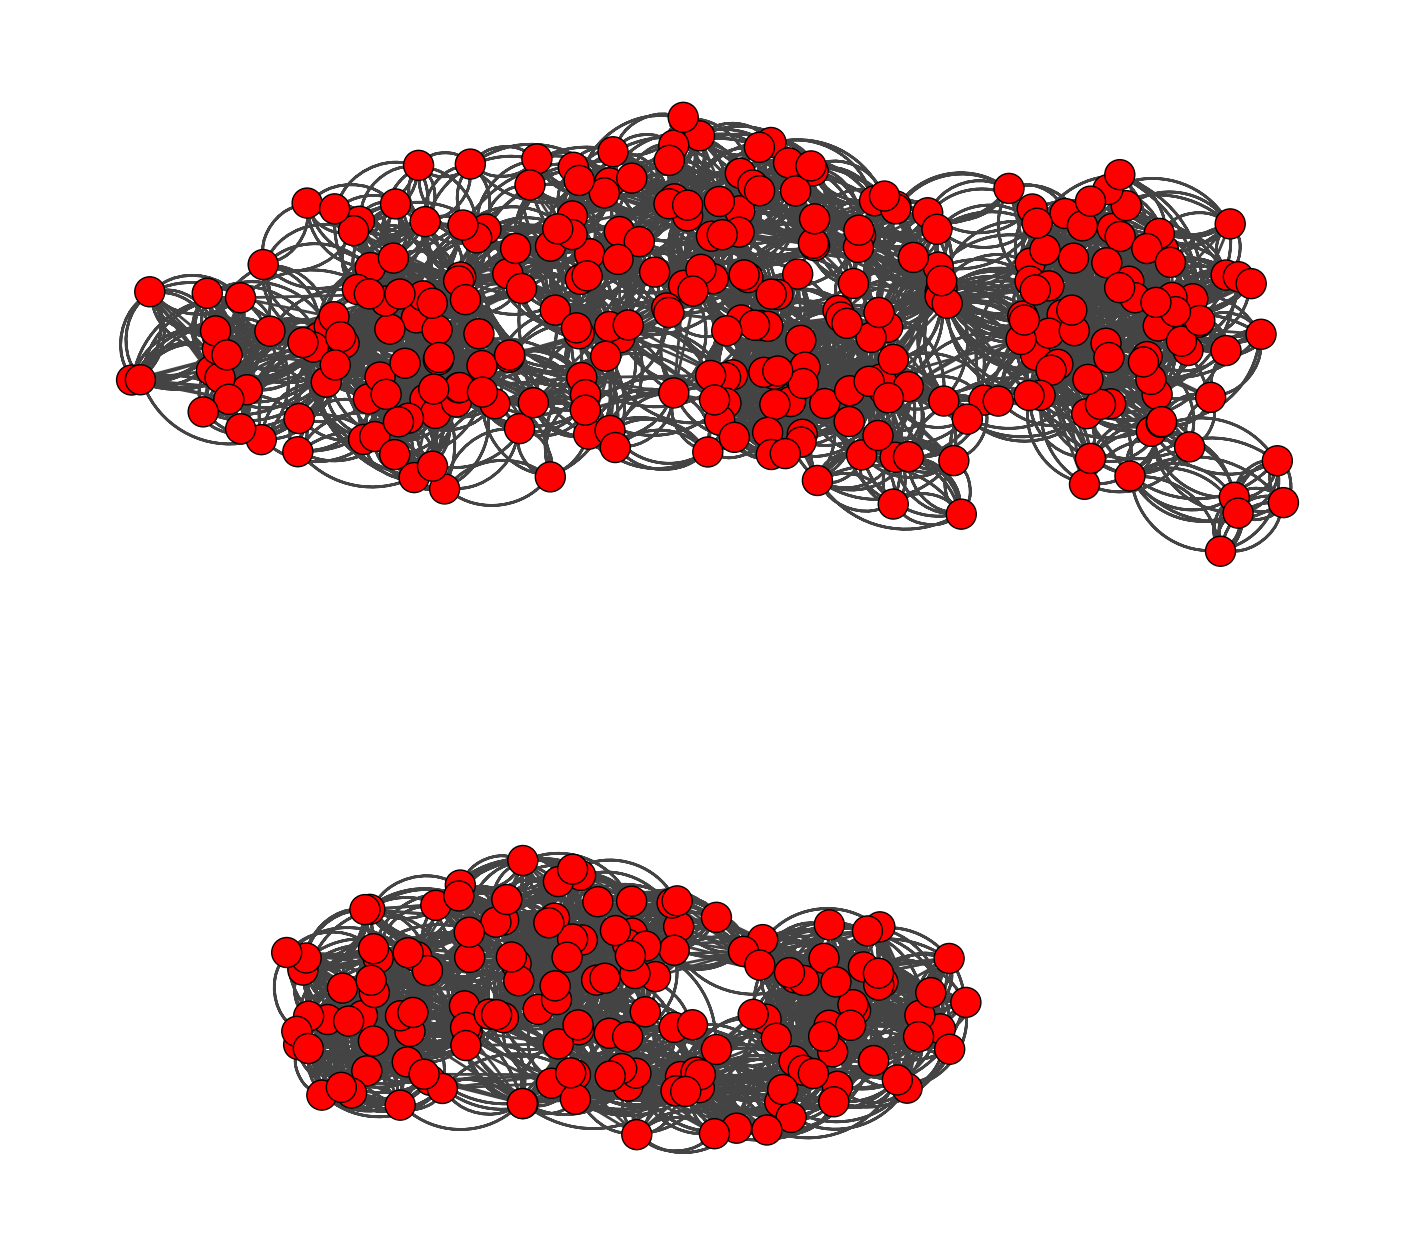

 Time it took to compute merge_graphs function:  10.98688
 Time it took to compute similarity_matrix function:  0.00083
Using optimal t value of 26
 Time it took to compute diffusion process:  1.21542
Fit process finished. We recommend calling optimize_by_creating_connections.


In [14]:
md.fit([dc0a.split_A, dc0a.split_B, dc0b.split_A], md.known_anchors)

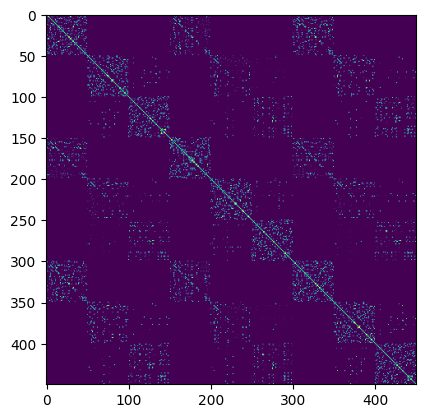

In [15]:
plt.imshow(md.graphAB)

In [16]:
sum(md.len_domains[:2]), md.len_domains[:2]

(300, [150, 150])

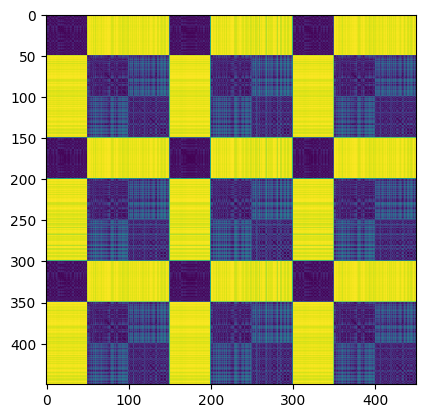

In [17]:
plt.imshow(md.int_diff_dist)

<Axes: >

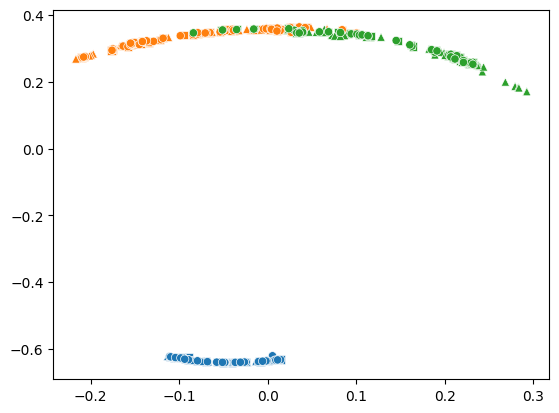

In [18]:
import seaborn as sns
import pandas as pd
from sklearn.manifold import MDS



mds = MDS(metric=True, dissimilarity = 'precomputed', random_state = 42, n_components=2)
labels_tripled = np.concatenate((dc0a.labels_doubled, dc0b.labels))
emb1 = mds.fit_transform(md.int_diff_dist)
styles = ['Graph1' if i < len(emb1[:]) / 3 else 'Graph2' if i < len(emb1[:]) * (2 / 3) else "Graph3" for i in range(len(emb1[:]))]

sns.scatterplot(legend = False, x = emb1[:, 0], y = emb1[:, 1], hue = pd.Categorical(labels_tripled), style = styles, markers = {"Graph1": 's', "Graph2": "^", "Graph3": "o"})